# TASK 2 - Prediction using Unsupervised Learning

### Author - Akash Chauhan

**OBJECTIVE** - From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

**IMPORTING LIBRARIES**

In [41]:
import numpy as pd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**READING THE DATA**

In [45]:
df = pd.read_csv('Iris.csv')
print('Successful!')

Successful!


**PERFORMING EDA**

In [46]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*'Id' doesn't seem to be a real feature. Hence, dropping it.*

In [47]:
df.drop(['Id'], axis =1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


**Plotting the pairplot**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

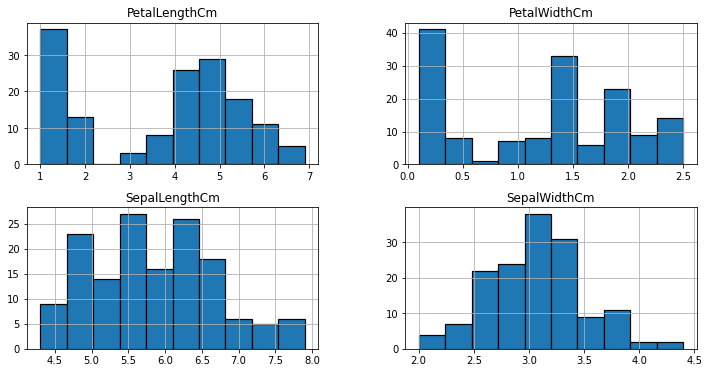

In [50]:
df.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

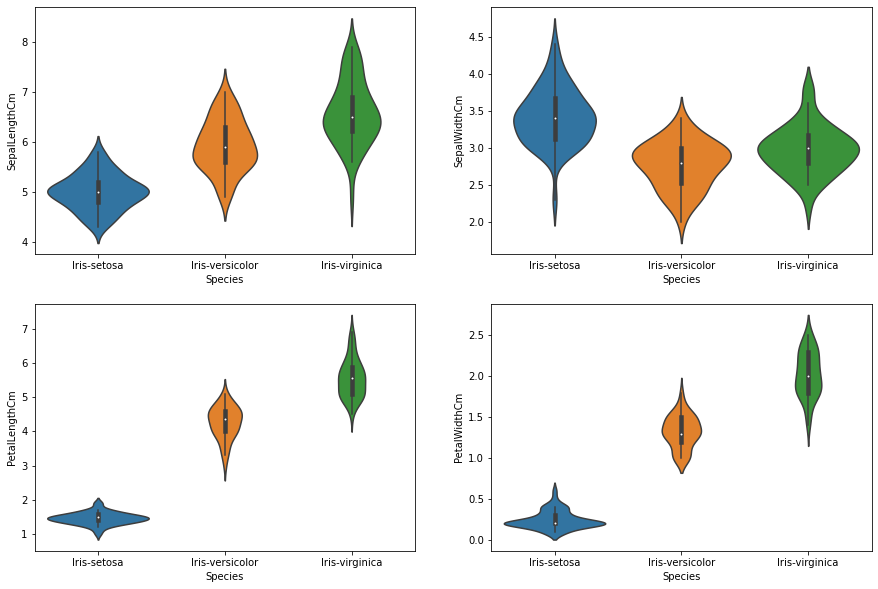

In [53]:
plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df)
plt.subplot(2, 2, 2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df)
plt.subplot(2, 2, 4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df)

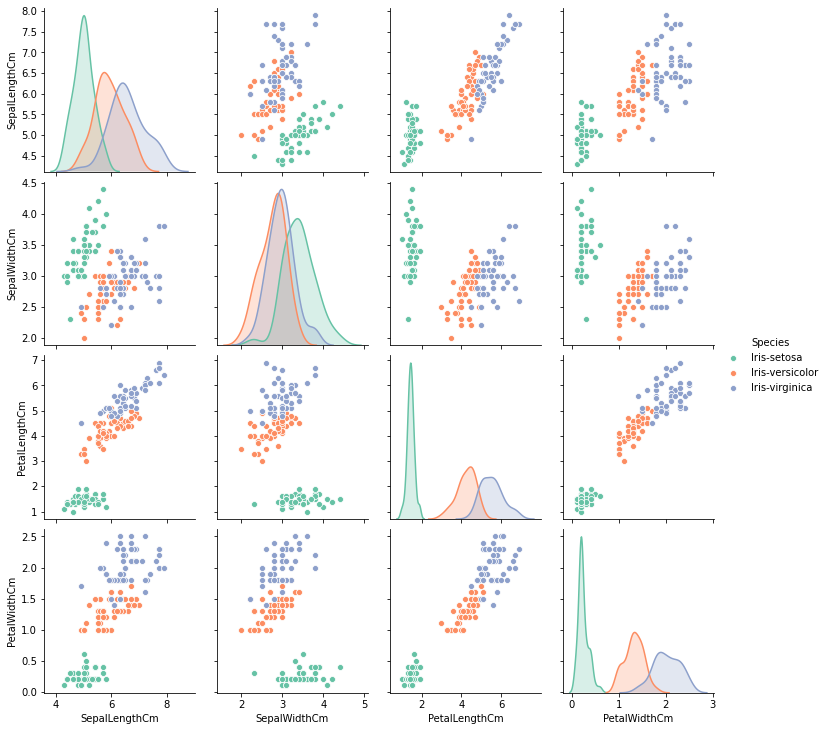

In [54]:
sns.pairplot(data = df, hue = 'Species', palette = 'Set2')
plt.show()

*From the data above we can observe that the Iris-setosa is easily separable from the other two, especially when we see different colors for corressponding labels like above.*

**ADJUSTING THE DATASET FOR UNSUPERVISED LEARNING**

In [60]:
features = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

**Implementing the K-Means clustering.**

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 99)

wcss = []
for k in range (1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

**Plotting the graph.**

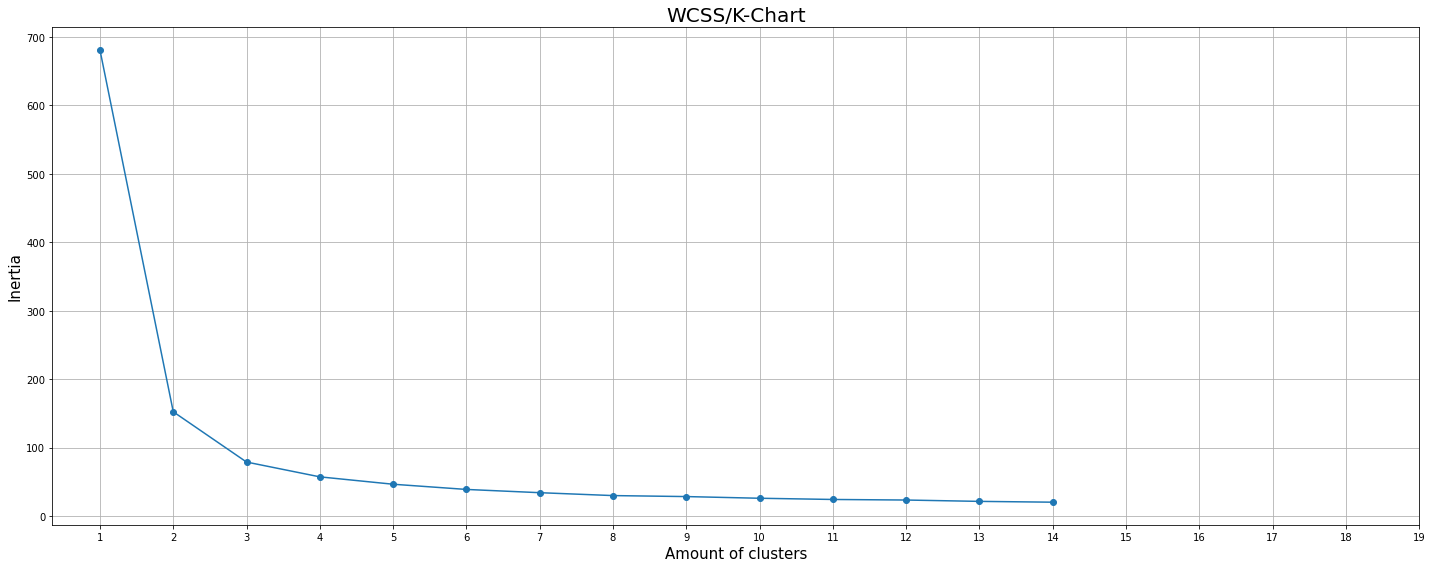

In [65]:
plt.figure(figsize = (20,8))
plt.title('WCSS/K-Chart', fontsize = 20)
plt.plot(range(1,15), wcss, '-o')
plt.grid(True)
plt.xlabel('Amount of clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

*By the elbow rule, 2 or 3 seems to be the best value for our clusters*

**Plotting the graph**

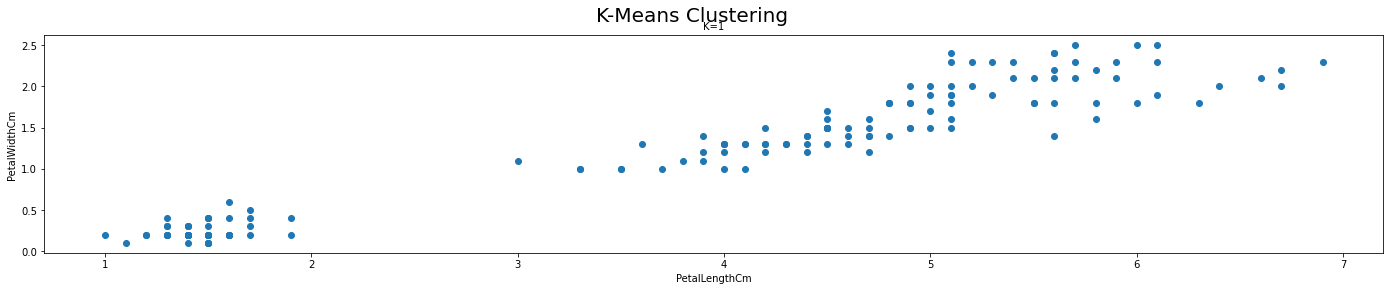

In [66]:
plt.figure(figsize = (24, 4))
plt.suptitle('K-Means Clustering', fontsize = 20)
plt.title('K=1', fontsize = 10)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(features.PetalLengthCm, features.PetalWidthCm)

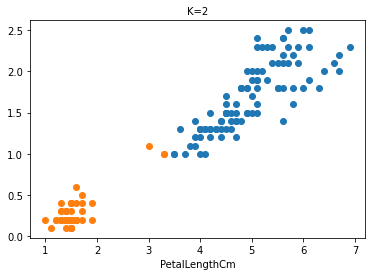

In [67]:
plt.title('K=2', fontsize = 10)
plt.xlabel('PetalLengthCm')
kmeans = KMeans(n_clusters = 2)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0], features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1], features.PetalWidthCm[features.labels == 1])

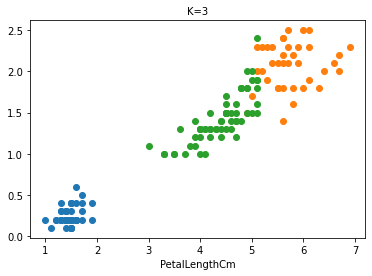

In [88]:
plt.title('K=3', fontsize = 10)
plt.xlabel('PetalLengthCm')
kmeans = KMeans(n_clusters = 3)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0], features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1], features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2], features.PetalWidthCm[features.labels == 2])

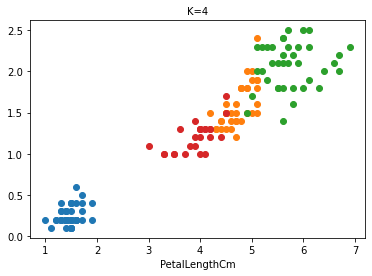

In [89]:
plt.title('K=4', fontsize = 10)
plt.xlabel('PetalLengthCm')
kmeans = KMeans(n_clusters = 4)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0], features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1], features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2], features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3], features.PetalWidthCm[features.labels == 3])

*Dropping labels since we want to use only features.*

In [ ]:
features.drop(['labels'], axis = 1, inplace = True)

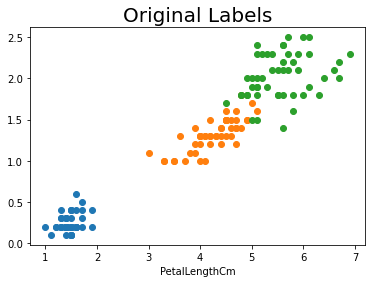

In [91]:
plt.title('Original Labels', fontsize = 20)
plt.xlabel('PetalLengthCm')
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-setosa'], df.PetalWidthCm[df.Species == 'Iris-setosa'])
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-versicolor'], df.PetalWidthCm[df.Species == 'Iris-versicolor'])
plt.scatter(df.PetalLengthCm[df.Species == 'Iris-virginica'], df.PetalWidthCm[df.Species == 'Iris-virginica'])

## Evidently, K-Means clustering did an amazing job with cluster count of 3. The ELBOW Chart was right which is substantiated with the predictions that is identical with the originals.